# Generalized polynomial based work

This notebook covers comparing two datasets, one of which will be considered the "base" dataset, and one will be the dataset which we compare to.
The environment is the normal cvasl environment (mrilander).

### import needed libraries

In [1]:
import os       # using operating system dependent functionality (folders)
import glob
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '../') # path to functions
from cvasl import file_handler as fh # 
from cvasl import mold #
from cvasl import carve
from cvasl import seperated
from cvasl.file_handler import Config

### get data

In [2]:
# set up data pull
config = Config()
root_mri_directory = config.get_directory('raw_data')

## Setting the base and comapared datasets
In this example we will use the TOP dataset as our base, and mriStroke as the other dataset.
This is highly problematic for anything stratified by gender, but we will overlook that for now,
as both datasets have about 50% women.

In [3]:
base = os.path.join(root_mri_directory, 'assembled/top_stitched.csv')
compared = os.path.join(root_mri_directory, 'assembled/StrokeMRI_stitched.csv')
# in the future the below should be base_data and the tricks will skip
our_top_data = pd.read_csv(base)
dataframe_compared = pd.read_csv(compared)

In [4]:
our_top_data.describe()

,Unnamed: 0,GM_vol_Liter,LongitudinalTimePoint_integer,WM_vol_Liter,WMH_count_n lesions (integer),WMH_vol_mL,CSF_vol_Liter,GMWM_ICVRatio_ratio (GM+WM)/ICV,SubjectNList_integer,Site_integer,...,PCA_intermediate_R_mL/100g/min,PCA_distal_B_mL/100g/min,PCA_distal_L_mL/100g/min,PCA_distal_R_mL/100g/min,TotalGM_B_mL/100g/min,TotalGM_L_mL/100g/min,TotalGM_R_mL/100g/min,TP,Sex,Age
count,531.000000,531.000000,531.0,531.000000,530.000000,530.000000,531.000000,531.000000,531.000000,531.0,...,530.000000,530.000000,530.000000,530.000000,531.000000,531.000000,531.000000,531.0,531.000000,531.000000
mean,265.000000,0.696949,1.0,0.528583,22.686792,2.544811,0.305973,0.800856,481.911488,1.0,...,68.168512,82.542477,84.607940,80.400771,71.637354,72.326591,70.937457,1.0,0.536723,37.548889
std,153.430766,0.065002,0.0,0.062762,25.417125,2.610323,0.061029,0.030877,263.559412,0.0,...,27.664396,21.810491,23.475250,21.128961,33.337993,32.396915,34.374866,0.0,0.499120,9.581361
min,0.000000,0.462590,1.0,0.355810,6.000000,0.202000,0.168650,0.704690,1.000000,1.0,...,38.917700,39.360600,37.833700,40.948800,42.737600,43.107600,42.339200,1.0,0.000000,17.720000
25%,132.500000,0.651255,1.0,0.483465,18.000000,1.431750,0.259940,0.781630,251.500000,1.0,...,59.141250,71.654125,72.646900,69.601425,62.507800,63.240100,61.598200,1.0,0.000000,30.260000
50%,265.000000,0.695710,1.0,0.522340,21.000000,2.024000,0.305920,0.800230,499.000000,1.0,...,65.745300,81.894000,84.263000,79.711750,68.913700,69.825000,68.117200,1.0,1.000000,37.730000
75%,397.500000,0.739395,1.0,0.568715,24.000000,2.998000,0.344785,0.822500,719.000000,1.0,...,73.811100,91.714475,93.919325,89.223475,76.291550,77.141900,75.756650,1.0,1.000000,44.950000
max,530.000000,0.909940,1.0,0.732160,570.000000,42.471000,0.548010,0.883590,895.000000,1.0,...,575.367100,429.595100,474.206100,394.829700,710.292300,684.509900,736.989500,1.0,1.000000,59.780000


We may have a mistake in our_top_data, white matter hyperintensities...also the total flows have outlier max values. Let's look

### temporary trick to deal with data inconsistency

In [6]:
our_top_data['GM_vol'] = our_top_data['GM_vol_Liter']
our_top_data['WM_vol'] = our_top_data['WM_vol_Liter']
our_top_data['CSF_vol'] = our_top_data['CSF_vol_Liter']
our_top_data['GM_ICVRatio'] = our_top_data['GM_ICVRatio_ratio GM/ICV'] 
our_top_data['WMH_vol'] = our_top_data['GMWM_ICVRatio_ratio (GM+WM)/ICV']
our_top_data['WMH_count'] = our_top_data['WMH_count_n lesions (integer)']
our_top_data['DeepWM_B'] = our_top_data['DeepWM_B_SD/mean']
our_top_data['DeepWM_L'] = our_top_data['DeepWM_L_SD/mean']
our_top_data['DeepWM_L'] = our_top_data['DeepWM_R_SD/mean']
our_top_data['ACA_B']= our_top_data['ACA_B_SD/mean']    
our_top_data['ACA_L']= our_top_data['ACA_L_SD/mean']           
our_top_data['ACA_R']= our_top_data['ACA_R_SD/mean']            
our_top_data['MCA_B']= our_top_data['MCA_B_SD/mean']      

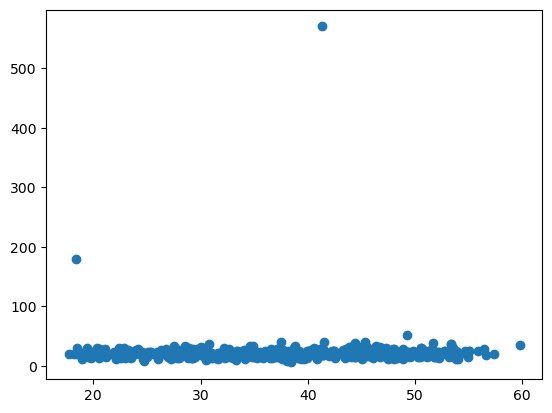

In [7]:
plt.scatter(our_top_data['Age'],our_top_data['WMH_count'])

In [8]:
our_top_data[our_top_data['WMH_count'] > 100]

,Unnamed: 0,index_,GM_vol_Liter,session_...,LongitudinalTimePoint_integer,WM_vol_Liter,WMH_count_n lesions (integer),WMH_vol_mL,CSF_vol_Liter,GMWM_ICVRatio_ratio (GM+WM)/ICV,...,CSF_vol,GM_ICVRatio,WMH_vol,WMH_count,DeepWM_B,DeepWM_L,ACA_B,ACA_L,ACA_R,MCA_B
87,87,sub-0239_1,0.68888,ASL_1,1,0.46799,179.0,26.247,0.23301,0.83235,...,0.23301,0.49564,0.83235,179.0,5.0432,3.7846,1.7255,1.7693,1.6802,2.1306
442,442,sub-1038_1,0.65458,ASL_1,1,0.57621,570.0,42.471,0.32367,0.79178,...,0.32367,0.42110,0.79178,570.0,3.0126,3.3417,3.5598,3.7908,3.3208,5.2816


In [9]:
our_top_data[our_top_data['WMH_count'] > 100]['Age']

87     18.40
442    41.29
Name: Age, dtype: float64

# Needs scientist decision
Someone with 570 WMH at age of 41 is abnormal, is there a mistake in the data? Also note the volumes are not particularly large.Or a sick patient?
Should we  drop such outliers? Automatically?

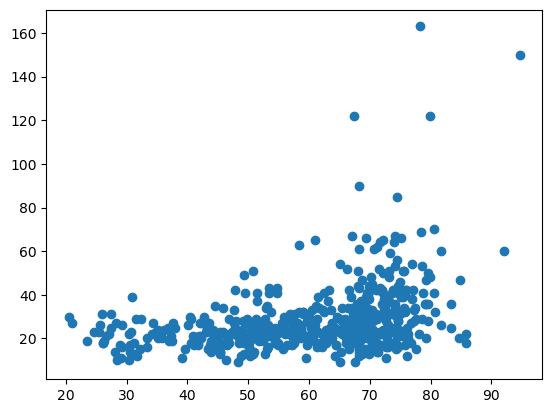

In [10]:
plt.scatter(dataframe_compared['Age'],dataframe_compared['WMH_count'])

## Moving on...

In [11]:
# now we find common columns; this will be easier when all is same formatted
shared_columns = (
        dataframe_compared.columns.intersection(our_top_data.columns)).to_list()

In [12]:
shared_columns

['Unnamed: 0',
 'GM_vol',
 'WM_vol',
 'CSF_vol',
 'GM_ICVRatio',
 'WMH_vol',
 'WMH_count',
 'renumber',
 'DeepWM_B',
 'DeepWM_L',
 'ACA_B',
 'ACA_L',
 'ACA_R',
 'MCA_B',
 'Sex',
 'Age']

### create base polynomials

In [13]:
# find common columns

In [14]:
special_data_column = 'Age'

In [15]:
other_columns = [
    'GM_vol',
     'WM_vol',
     'CSF_vol',
     'GM_ICVRatio',
     'WMH_vol',
     'WMH_count',
     'DeepWM_B',
     'DeepWM_L',
     'ACA_B',
     'ACA_L',
     'ACA_R',
     'MCA_B', ]

In [16]:
our_top_data

,Unnamed: 0,index_,GM_vol_Liter,session_...,LongitudinalTimePoint_integer,WM_vol_Liter,WMH_count_n lesions (integer),WMH_vol_mL,CSF_vol_Liter,GMWM_ICVRatio_ratio (GM+WM)/ICV,...,CSF_vol,GM_ICVRatio,WMH_vol,WMH_count,DeepWM_B,DeepWM_L,ACA_B,ACA_L,ACA_R,MCA_B
0,0,sub-0001_1,0.71736,ASL_1,1,0.52803,24.0,1.743,0.31812,0.79653,...,0.31812,0.45881,0.79653,24.0,8.7620,8.9388,2.2748,2.3388,2.1197,2.3205
1,1,sub-0002_1,0.72383,ASL_1,1,0.62394,23.0,1.629,0.25673,0.83999,...,0.25673,0.45112,0.83999,23.0,9.0749,10.2840,1.7564,1.7518,1.7082,2.3989
2,2,sub-0019_1,0.71224,ASL_1,1,0.53295,13.0,0.621,0.33594,0.78753,...,0.33594,0.45046,0.78753,13.0,8.8791,8.8246,1.9850,1.9140,2.0353,1.8702
3,3,sub-0020_1,0.67042,ASL_1,1,0.43458,23.0,0.736,0.25974,0.80968,...,0.25974,0.49124,0.80968,23.0,6.2080,6.1139,1.8657,1.8980,1.8358,1.9092
4,4,sub-0022_1,0.63666,ASL_1,1,0.46938,22.0,2.009,0.22144,0.83319,...,0.22144,0.47960,0.83319,22.0,7.4561,7.3614,1.6049,1.5923,1.6123,2.0383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,526,sub-1163_1,0.78201,ASL_1,1,0.49489,18.0,1.431,0.24608,0.83842,...,0.24608,0.51347,0.83842,18.0,8.2103,8.7134,1.9598,1.8279,1.9940,2.1176
527,527,sub-1165_1,0.71537,ASL_1,1,0.48601,18.0,1.425,0.27123,0.81582,...,0.27123,0.48578,0.81582,18.0,6.6858,7.0912,1.4851,1.4708,1.5045,1.9477
528,528,sub-1167_1,0.73473,ASL_1,1,0.53549,20.0,3.935,0.35985,0.77924,...,0.35985,0.45074,0.77924,20.0,4.5665,4.3038,1.8432,1.8513,1.8286,2.0176
529,529,sub-1168_1,0.71094,ASL_1,1,0.60974,26.0,4.170,0.37480,0.77894,...,0.37480,0.41931,0.77894,26.0,9.5267,9.0904,1.7798,1.6765,1.8759,1.9444


In [17]:
# below functions must go into main library

In [18]:


def polyfit_second_degree_to_df(
        dataframe,
        special_column_name,
        other_column_names,
):
    """
    This function creates a polynomial for two columns.
    It returns the coefficients
    
    :param dataframe: dataframe variable
    :type dataframe: pandas.dataFrame
    :param special_column_name: string of column you want to graph against
    :type  special_column_name: str
    :param other_column_name: string of column you want to graph
    :type other_column_name: str
    :param degree_poly: either 1,2 or 3 only
    :type  degree_poly: int


    :returns: coeffiects
    :rtype: :class:`~numpy.ndarray`
    """
    list_as = []
    list_bs = []
    list_cs = []
    list_columns = []
    dataframe = dataframe.dropna()
    for interest_column_name in other_column_names:
        xscat = np.array(pd.to_numeric(dataframe[special_column_name]))
        yscat = np.array(pd.to_numeric(dataframe[interest_column_name]))
        coefficients = np.polyfit(xscat, yscat, 2 ) #2 = degree_poly
        list_columns.append(interest_column_name)
        list_as.append(coefficients[0])
        list_bs.append(coefficients[1])
        list_cs.append(coefficients[2])
    d = {'column':list_columns,'coefficient_a':list_as, 'coefficient_b':list_bs, 'coefficient_c':list_cs}
    coefficien_dataframe = pd.DataFrame(d)
   
    return coefficien_dataframe


In [19]:
def derived_function(column, a, b, c):
    return a * (column**2) + b * column + c


In [20]:
cos_dataframe = polyfit_second_degree_to_df(
        our_top_data,#dataframe_base,
        special_data_column,
        other_columns,
)
cos_dataframe

,column,coefficient_a,coefficient_b,coefficient_c
0,GM_vol,-0.000012,-0.002151,0.795380
1,WM_vol,-0.000085,0.006655,0.406386
2,CSF_vol,0.000006,0.002480,0.203789
3,GM_ICVRatio,0.000019,-0.003429,0.556799
4,WMH_vol,-0.000016,-0.000725,0.851483
5,WMH_count,0.003235,-0.182226,24.661956
6,DeepWM_B,-0.002006,0.101910,6.774059
7,DeepWM_L,-0.002127,0.113351,6.488748
8,ACA_B,0.000066,-0.005784,1.973782
9,ACA_L,0.000091,-0.008690,2.049764


In [21]:
projected_columns = []
coefficients = ['coefficient_a', 'coefficient_b', 'coefficient_c']
for column in our_top_data[shared_columns].columns:
    projected_columns.append(column + '_projected')
    row = cos_dataframe[cos_dataframe['column'] == column]
    if row.empty:
        # The columns that appear "weird" below (eg. `Series([], dtype: float64)`)
        # are the columns not found in `cos_dataframe`, so they don't have associated coefficients..
        print('skipping', column)
        continue
    a, b, c = row[coefficients].values.flatten().tolist()
    our_top_data[column + '_projected'] = derived_function(our_top_data['Age'], a, b, c)
our_top_data

skipping Unnamed: 0
skipping renumber
skipping Sex
skipping Age


,Unnamed: 0,index_,GM_vol_Liter,session_...,LongitudinalTimePoint_integer,WM_vol_Liter,WMH_count_n lesions (integer),WMH_vol_mL,CSF_vol_Liter,GMWM_ICVRatio_ratio (GM+WM)/ICV,...,CSF_vol_projected,GM_ICVRatio_projected,WMH_vol_projected,WMH_count_projected,DeepWM_B_projected,DeepWM_L_projected,ACA_B_projected,ACA_L_projected,ACA_R_projected,MCA_B_projected
0,0,sub-0001_1,0.71736,ASL_1,1,0.52803,24.0,1.743,0.31812,0.79653,...,0.322716,0.443130,0.790570,22.854760,7.411559,7.396210,1.846598,1.844713,1.823944,1.985095
1,1,sub-0002_1,0.72383,ASL_1,1,0.62394,23.0,1.629,0.25673,0.83999,...,0.307362,0.452970,0.800926,22.427466,7.734274,7.710629,1.848708,1.851013,1.822728,2.000969
2,2,sub-0019_1,0.71224,ASL_1,1,0.53295,13.0,0.621,0.33594,0.78753,...,0.290004,0.465604,0.811855,22.150655,7.972657,7.931341,1.855560,1.864434,1.824292,2.028135
3,3,sub-0020_1,0.67042,ASL_1,1,0.43458,23.0,0.736,0.25974,0.80968,...,0.261105,0.490517,0.828053,22.219716,8.044643,7.952605,1.878449,1.902960,1.834446,2.097050
4,4,sub-0022_1,0.63666,ASL_1,1,0.46938,22.0,2.009,0.22144,0.83319,...,0.305082,0.454536,0.802410,22.378311,7.773433,7.747980,1.849331,1.852386,1.822751,2.003966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,526,sub-1163_1,0.78201,ASL_1,1,0.49489,18.0,1.431,0.24608,0.83842,...,0.253190,0.498257,0.832018,22.363795,7.987625,7.876662,1.887430,1.917334,1.839011,2.121521
527,527,sub-1165_1,0.71537,ASL_1,1,0.48601,18.0,1.425,0.27123,0.81582,...,0.294477,0.462189,0.809121,22.200222,7.924574,7.888686,1.853323,1.860312,1.823579,2.020163
528,528,sub-1167_1,0.73473,ASL_1,1,0.53549,20.0,3.935,0.35985,0.77924,...,0.294649,0.462060,0.809014,22.202443,7.922529,7.886838,1.853244,1.860162,1.823556,2.019869
529,529,sub-1168_1,0.71094,ASL_1,1,0.60974,26.0,4.170,0.37480,0.77894,...,0.328174,0.439918,0.786740,23.045868,7.272795,7.258820,1.846697,1.843670,1.824935,1.981203


In [22]:
shared_columns_new =  ['GM_vol',
 'WM_vol',
 'CSF_vol',
 'GM_ICVRatio',
 'WMH_vol',
 'WMH_count',
 'DeepWM_B',
 'DeepWM_L',
 'ACA_B',
 'ACA_L',
 'ACA_R',
 'MCA_B',]

In [23]:
difference_columns = []
for column in our_top_data[shared_columns_new].columns:
    difference_columns.append(column+ '_diff')
    our_top_data[column + '_diff'] = our_top_data[column] - our_top_data[column + '_projected']
    our_top_data[column + '_abs_diff'] = abs(our_top_data[column] - our_top_data[column + '_projected'])
our_top_data    

,Unnamed: 0,index_,GM_vol_Liter,session_...,LongitudinalTimePoint_integer,WM_vol_Liter,WMH_count_n lesions (integer),WMH_vol_mL,CSF_vol_Liter,GMWM_ICVRatio_ratio (GM+WM)/ICV,...,DeepWM_L_diff,DeepWM_L_abs_diff,ACA_B_diff,ACA_B_abs_diff,ACA_L_diff,ACA_L_abs_diff,ACA_R_diff,ACA_R_abs_diff,MCA_B_diff,MCA_B_abs_diff
0,0,sub-0001_1,0.71736,ASL_1,1,0.52803,24.0,1.743,0.31812,0.79653,...,1.542590,1.542590,0.428202,0.428202,0.494087,0.494087,0.295756,0.295756,0.335405,0.335405
1,1,sub-0002_1,0.72383,ASL_1,1,0.62394,23.0,1.629,0.25673,0.83999,...,2.573371,2.573371,-0.092308,0.092308,-0.099213,0.099213,-0.114528,0.114528,0.397931,0.397931
2,2,sub-0019_1,0.71224,ASL_1,1,0.53295,13.0,0.621,0.33594,0.78753,...,0.893259,0.893259,0.129440,0.129440,0.049566,0.049566,0.211008,0.211008,-0.157935,0.157935
3,3,sub-0020_1,0.67042,ASL_1,1,0.43458,23.0,0.736,0.25974,0.80968,...,-1.838705,1.838705,-0.012749,0.012749,-0.004960,0.004960,0.001354,0.001354,-0.187850,0.187850
4,4,sub-0022_1,0.63666,ASL_1,1,0.46938,22.0,2.009,0.22144,0.83319,...,-0.386580,0.386580,-0.244431,0.244431,-0.260086,0.260086,-0.210451,0.210451,0.034334,0.034334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,526,sub-1163_1,0.78201,ASL_1,1,0.49489,18.0,1.431,0.24608,0.83842,...,0.836738,0.836738,0.072370,0.072370,-0.089434,0.089434,0.154989,0.154989,-0.003921,0.003921
527,527,sub-1165_1,0.71537,ASL_1,1,0.48601,18.0,1.425,0.27123,0.81582,...,-0.797486,0.797486,-0.368223,0.368223,-0.389512,0.389512,-0.319079,0.319079,-0.072463,0.072463
528,528,sub-1167_1,0.73473,ASL_1,1,0.53549,20.0,3.935,0.35985,0.77924,...,-3.583038,3.583038,-0.010044,0.010044,-0.008862,0.008862,0.005044,0.005044,-0.002269,0.002269
529,529,sub-1168_1,0.71094,ASL_1,1,0.60974,26.0,4.170,0.37480,0.77894,...,1.831580,1.831580,-0.066897,0.066897,-0.167170,0.167170,0.050965,0.050965,-0.036803,0.036803


## Now we want to do the same to the compared dataframe

In [24]:
#dataframe_compared

projected_columns = []
coefficients = ['coefficient_a', 'coefficient_b', 'coefficient_c']
for column in dataframe_compared[shared_columns].columns:
    projected_columns.append(column + '_projected')
    row = cos_dataframe[cos_dataframe['column'] == column]
    if row.empty:
        # The columns that appear "weird" below (eg. `Series([], dtype: float64)`)
        # are the columns not found in `cos_dataframe`, so they don't have associated coefficients..
        print('skipping', column)
        continue
    a, b, c = row[coefficients].values.flatten().tolist()
    dataframe_compared[column + '_projected'] = derived_function(dataframe_compared['Age'], a, b, c)
difference_columns = []
for column in dataframe_compared[shared_columns_new].columns:
    difference_columns.append(column+ '_diff')
    dataframe_compared[column + '_diff'] = dataframe_compared[column] - dataframe_compared[column + '_projected']
    dataframe_compared[column + '_abs_diff'] = abs(dataframe_compared[column] - dataframe_compared[column + '_projected'])
dataframe_compared

skipping Unnamed: 0
skipping renumber
skipping Sex
skipping Age


,Unnamed: 0,session,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,...,DeepWM_L_diff,DeepWM_L_abs_diff,ACA_B_diff,ACA_B_abs_diff,ACA_L_diff,ACA_L_abs_diff,ACA_R_diff,ACA_R_abs_diff,MCA_B_diff,MCA_B_abs_diff
0,0,ASL_1,TimePoint_1,1,1,0.61078,0.47594,0.30805,0.43791,0.77914,...,-7.977857,7.977857,-1.859777,1.859777,-1.871906,1.871906,-1.825869,1.825869,-2.042129,2.042129
1,1,ASL_1,TimePoint_1,2,1,0.64754,0.49441,0.31320,0.44500,0.78476,...,1.211873,1.211873,-0.119326,0.119326,-0.072857,0.072857,-0.143501,0.143501,-0.008263,0.008263
2,2,ASL_1,TimePoint_1,3,1,0.60517,0.48594,0.42304,0.39968,0.72061,...,-0.857313,0.857313,0.087386,0.087386,0.079963,0.079963,0.108495,0.108495,-0.284012,0.284012
3,3,ASL_1,TimePoint_1,4,1,0.62367,0.53915,0.43119,0.39126,0.72949,...,-3.132354,3.132354,0.377485,0.377485,0.400312,0.400312,0.374665,0.374665,-0.047577,0.047577
4,4,ASL_1,TimePoint_1,5,1,0.61724,0.53779,0.33692,0.41371,0.77417,...,-0.985774,0.985774,-0.041217,0.041217,-0.102220,0.102220,-0.165016,0.165016,0.008745,0.008745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,ASL_1,TimePoint_2,339,1,0.57528,0.50907,0.52840,0.35671,0.67236,...,-0.705288,0.705288,0.673517,0.673517,0.919179,0.919179,0.163469,0.163469,0.602426,0.602426
585,585,ASL_1,TimePoint_1,340,1,0.58338,0.48623,0.41528,0.39288,0.72033,...,1.007644,1.007644,0.237230,0.237230,0.259340,0.259340,0.251663,0.251663,-0.102873,0.102873
586,586,ASL_1,TimePoint_2,340,1,0.58675,0.47585,0.42899,0.39337,0.71239,...,0.963147,0.963147,-0.076145,0.076145,0.015056,0.015056,-0.120402,0.120402,-0.167480,0.167480
587,587,ASL_1,TimePoint_1,341,1,0.63929,0.55235,0.39661,0.40251,0.75028,...,0.002703,0.002703,-0.213712,0.213712,-0.229449,0.229449,-0.172047,0.172047,-0.021594,0.021594


In [36]:
shared_columns_rel = ['GM_vol',
 'WM_vol',
 'CSF_vol',
 'GM_ICVRatio',
 'WMH_vol',
 'WMH_count',
 'DeepWM_B',
 'DeepWM_L',
 'ACA_B',
 'ACA_L',
 'ACA_R',
 'MCA_B',]

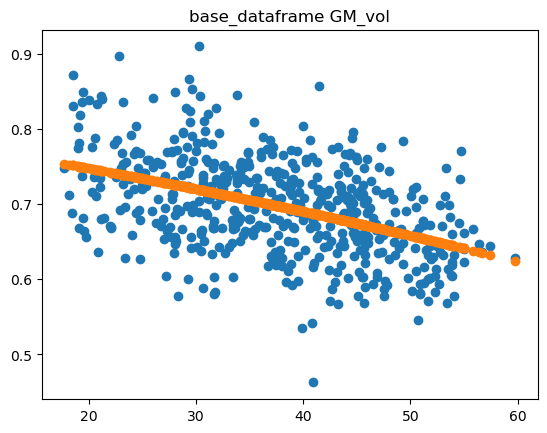

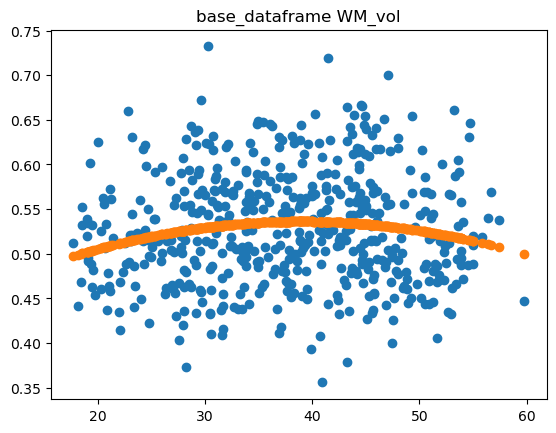

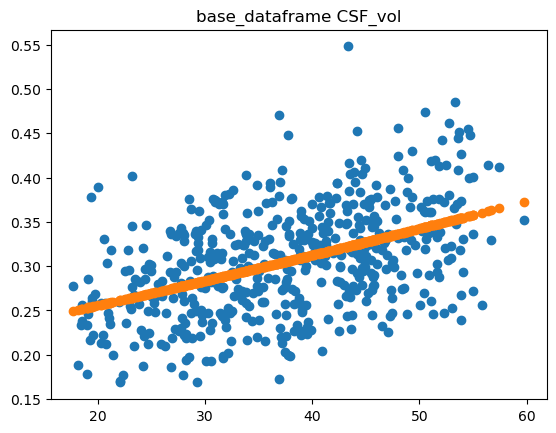

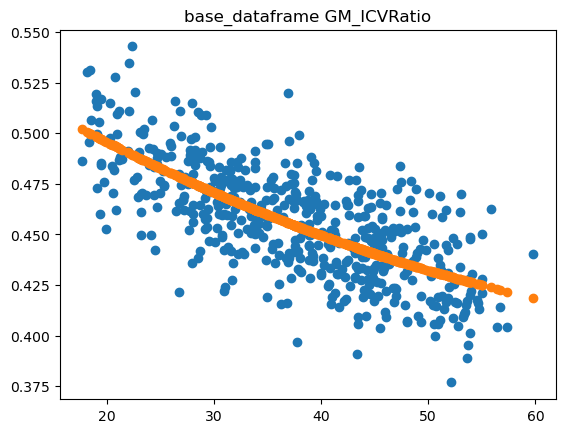

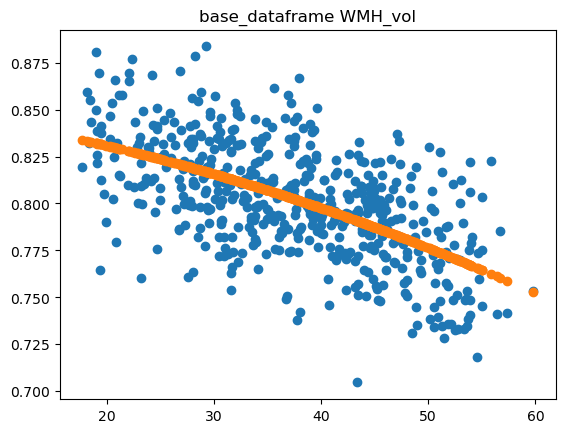

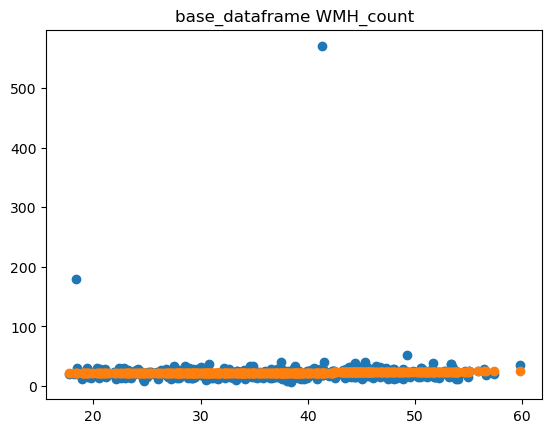

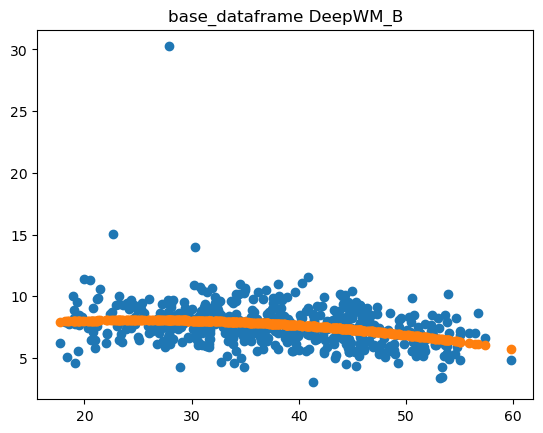

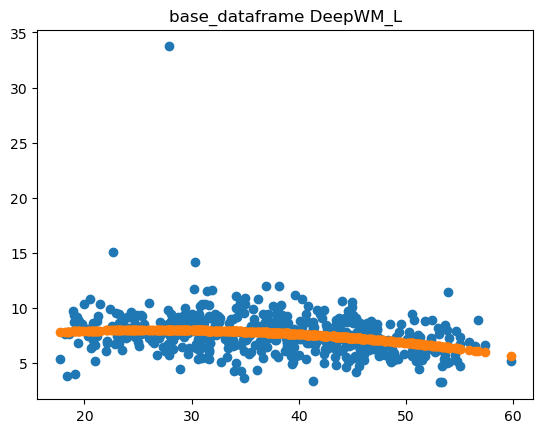

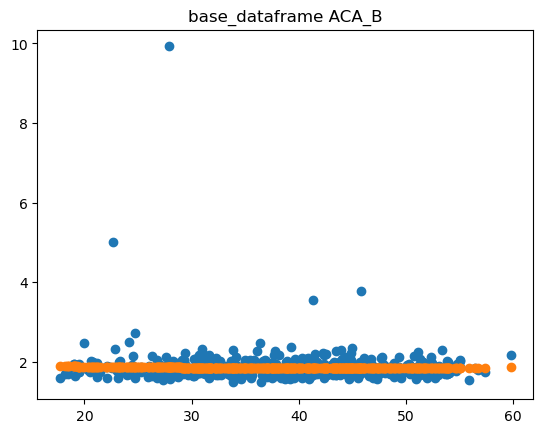

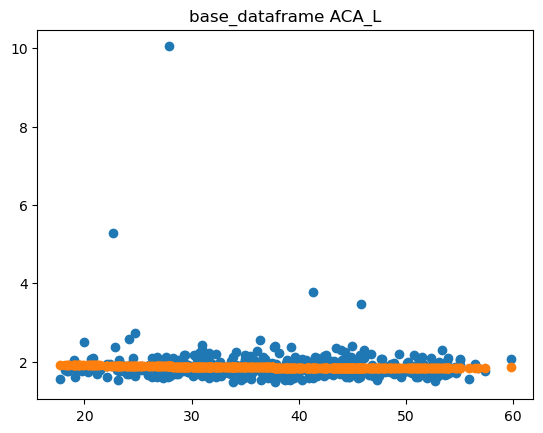

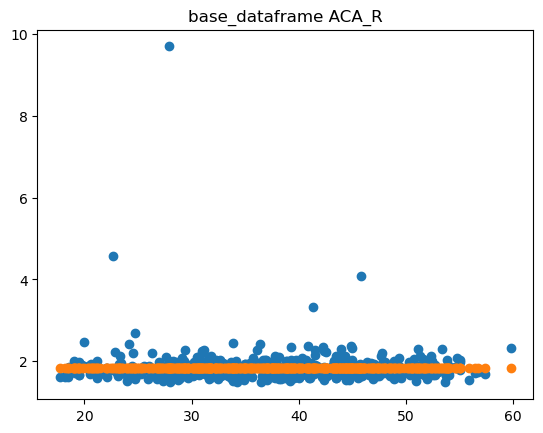

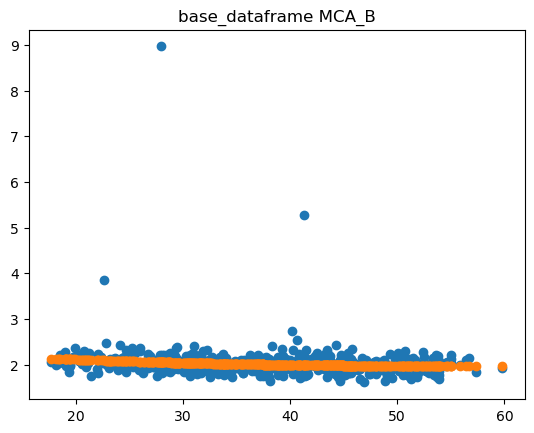

In [40]:
for column in our_top_data[shared_columns_rel].columns:
    plt.figure()
    plt.title('base_dataframe ' +column)
    plt.scatter(our_top_data['Age'],our_top_data[column])
    plt.scatter(our_top_data['Age'],our_top_data[column + '_projected'])

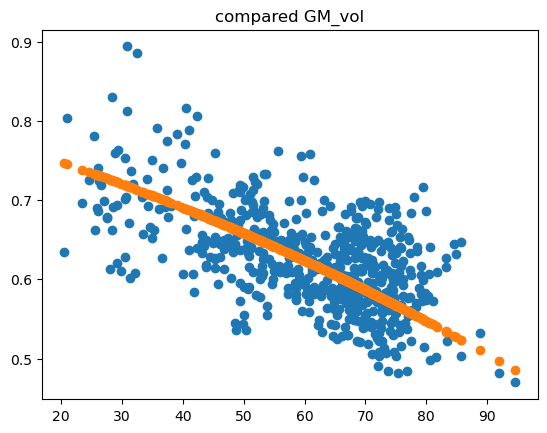

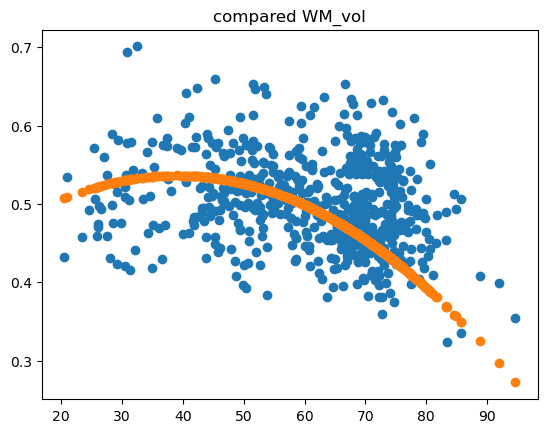

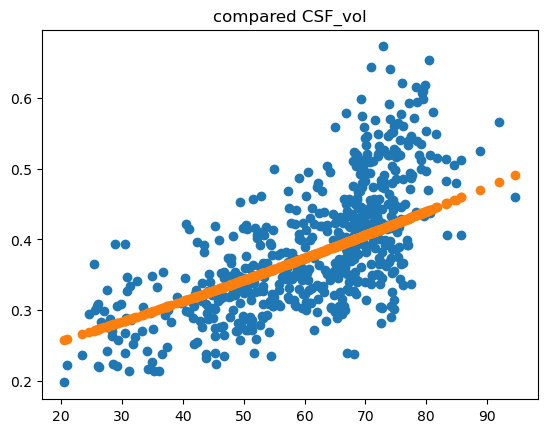

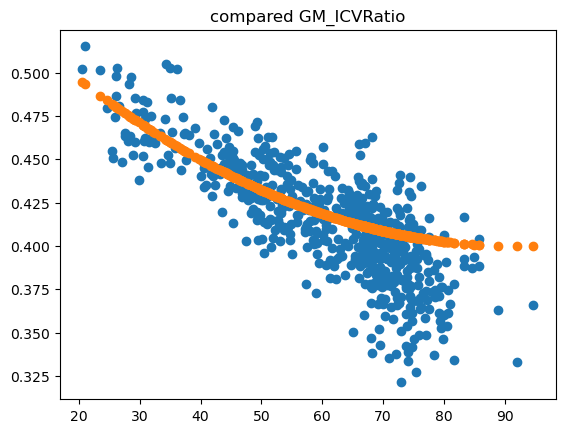

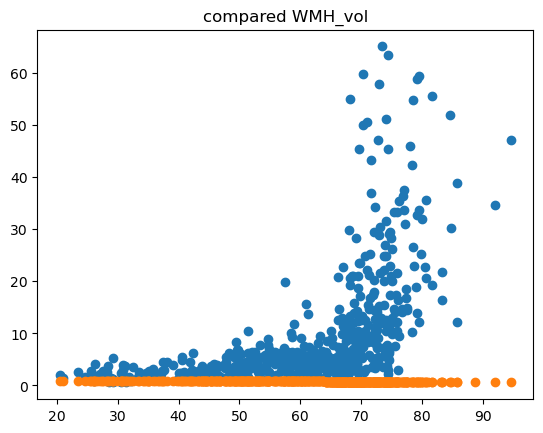

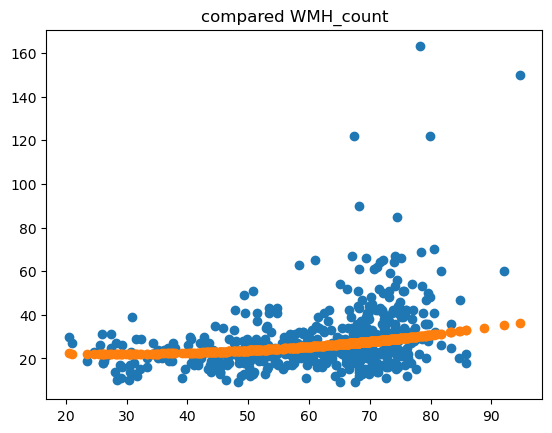

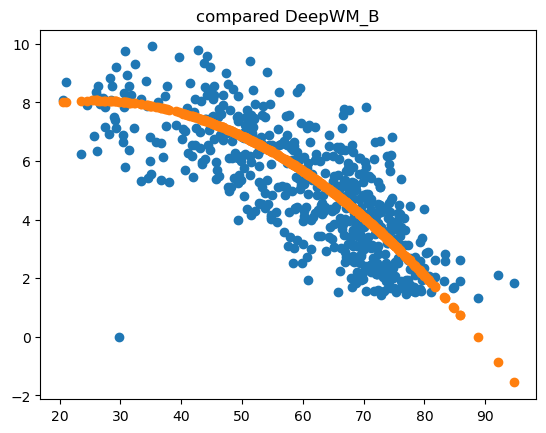

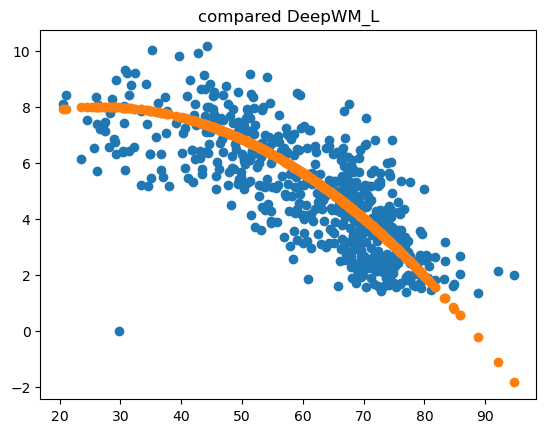

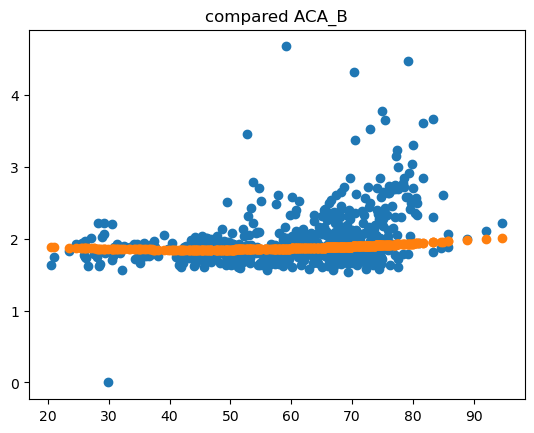

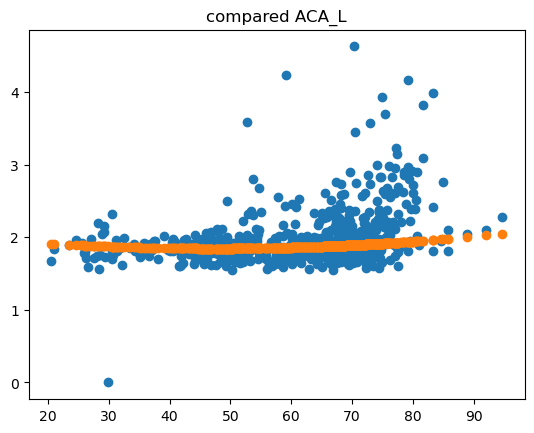

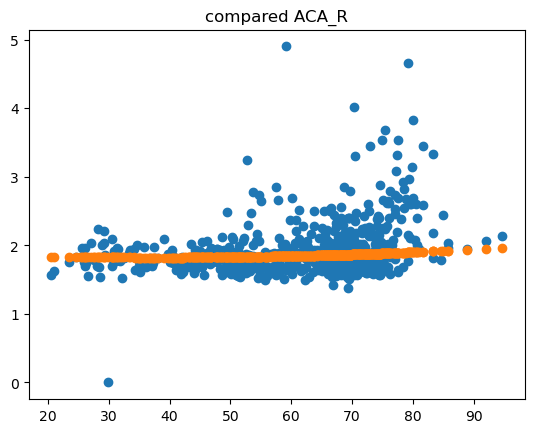

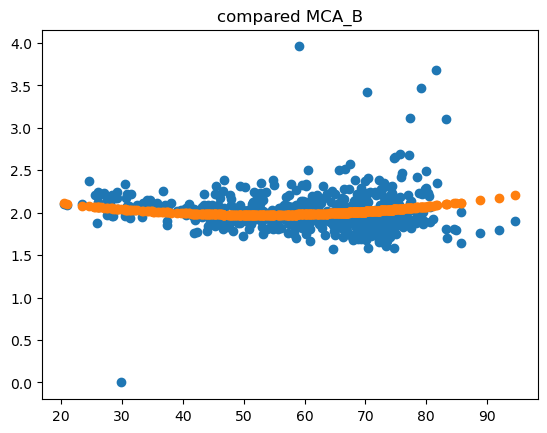

In [41]:
for column in dataframe_compared[shared_columns_rel].columns:
    plt.figure()
    plt.title('compared ' +column)
    plt.scatter(dataframe_compared['Age'],dataframe_compared[column])
    plt.scatter(dataframe_compared['Age'],dataframe_compared[column + '_projected'])

## describe the differences in base dataframe, the compared dataframe

In [ ]:
list_diff_dc =dataframe_compared.columns[dataframe_compared.columns.str.contains("diff")].to_list()
list_diff_top = our_top_data.columns[our_top_data.columns.str.contains("diff")].to_list()

In [ ]:
our_top_data[list_diff_top].describe()

In [ ]:
dataframe_compared[list_diff_dc].describe()

In [ ]:
dataframe_compared[list_diff_dc].describe().loc['max']

In [ ]:
# if this number is positive or zero we are golden!
outer_top_minus_outer_mri_top_poly = our_top_data[list_diff_dc].describe().loc['max'] - dataframe_compared[list_diff_dc].describe().loc['max'] 
outer_top_minus_outer_mri_top_poly

In [ ]:
# #our_top_data[['Age', 'GM_vol', 'GM_vol_projected']].sort_values(by='Age')
# plt.scatter(our_top_data['Age'],our_top_data[ 'GM_vol'])
# plt.scatter(our_top_data['Age'],our_top_data[ 'GM_vol_projected'])

In [ ]:
# #cos_dataframe[1]['coefficient_a']
# cos_dataframe.loc[cos_dataframe['column'] == "GM_vol", 'coefficient_a']

In [ ]:
# # extract multipliers and make new columns
# coef_a = cos_dataframe.loc[cos_dataframe['column'] == "GM_vol", 'coefficient_a']
# coef_b = cos_dataframe.loc[cos_dataframe['column'] == "GM_vol", 'coefficient_b']
# coef_c = cos_dataframe.loc[cos_dataframe['column'] == "GM_vol", 'coefficient_c']
# our_top_data['GM_vol_projected'] = derived_function(our_top_data['Age'], coef_a, coef_b,  coef_c)

In [ ]:
#for column in our_top_data[projected_columns].columns:


In [ ]:
# coef_a = cos_dataframe.loc[cos_dataframe['column'] == "WM_vol", 'coefficient_a']
# coef_b = cos_dataframe.loc[cos_dataframe['column'] == "WM_vol", 'coefficient_b']
# coef_c = cos_dataframe.loc[cos_dataframe['column'] == "WM_vol", 'coefficient_c']
# our_top_data['WM_vol_projected'] = derived_function(our_top_data['Age'], coef_a, coef_b,  coef_c)

In [ ]:
# coef_a = cos_dataframe.loc[cos_dataframe['column'] == "WMH_vol", 'coefficient_a']
# coef_b = cos_dataframe.loc[cos_dataframe['column'] == "WMH_vol", 'coefficient_b']
# coef_c = cos_dataframe.loc[cos_dataframe['column'] == "WMH_vol", 'coefficient_c']
# our_top_data['WMH_vol_projected'] = derived_function(our_top_data['Age'], coef_a, coef_b,  coef_c)